# Project 3: Waze Churn Prediction

### Group 8

**Group Members:**
- Kevin Obote
- Grace
- John
- John Dod
- Grace


## Introduction

Waze’s free navigation app makes it easier for drivers around the world to get to where they want to go. The app's community of map editors, beta testers, translators, partners, and users helps make each drive better and safer. This project is part of a larger effort at Waze to increase growth and enhance user retention.

Typically, high retention rates indicate satisfied users who repeatedly use the Waze app over time. Developing a churn prediction model will help prevent churn, improve user retention, and grow Waze’s business. By identifying users at risk of churning, Waze can implement targeted interventions to keep users engaged and satisfied.

The dataset used for this project contains 14,999 rows, each representing a unique user, and 13 columns with various features related to user activity and engagement. The aim is to analyze this data, build a predictive model for churn, and provide actionable insights to improve user retention.

### Class Walkthrough

In [1]:
# Import pandas library
import pandas as pd

In [2]:
# Load Waze dataset into dataframe
waze_df = pd.read_csv('waze_dataset.csv')

In [3]:
# By applying method, show first 7 rows in dataframe
waze_df.head(n=7)

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android
5,5,retained,113,103,279.544437,2637,0,0,901.238699,439.101397,15,11,iPhone
6,6,retained,3,2,236.725314,360,185,18,5249.172828,726.577205,28,23,iPhone


In [4]:
# By applying method, show summary information about the dataframe

waze_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


In [5]:
# By applying attribute, check the list of column labels in dataframe
waze_df.columns


Index(['ID', 'label', 'sessions', 'drives', 'total_sessions',
       'n_days_after_onboarding', 'total_navigations_fav1',
       'total_navigations_fav2', 'driven_km_drives', 'duration_minutes_drives',
       'activity_days', 'driving_days', 'device'],
      dtype='object')

In [6]:
# By applying attribute, show tuple representing dimensionality 
# (number of rows and columns) of the dataframe

waze_df.shape

(14999, 13)

In [7]:
# By applying attribute, show from 1st to 3rd rows (ID 0-2)
# You can use either iloc or loc

# waze_df.loc[0:2, :]
waze_df.iloc[0:3, :]


,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android


In [8]:
# Show 'ID', 'activity_days', and 'device' of 100th to 103th row
# You can use either iloc or loc

waze_df.loc[100:103, ['ID', 'activity_days', 'device']]

# waze_df.iloc[100:104, [0, 10, 12]]

,ID,activity_days,device
100,100,2,iPhone
101,101,6,iPhone
102,102,0,iPhone
103,103,21,iPhone


In [9]:
# Show the total_sessions of 12000th row
# You can use either iloc or loc

# waze_df.loc[12000, 'total_sessions']

waze_df.iloc[12000, 4]

52.53017243

In [10]:
# Add a new column 'percent_days_active' which is computed by: (activity_days/n_days_after_onboarding)*100 to dataframe
# to show the percentage of acticity days realtive to number of days since onboarding.
# Then show first 5 rows of dataframe.

waze_df['percent_days_active'] = (waze_df['activity_days'] / waze_df['n_days_after_onboarding']) * 100
waze_df.head(n=5)

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,percent_days_active
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android,1.230228
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone,1.061224
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android,0.528103
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone,46.666667
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android,1.728553


## Waze Project Walkthrough

### Step 0: Importing required Libraries

In [11]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.impute import SimpleImputer

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, classification_report


### Step 1: Load Data

In [12]:
# Load the dataset using Pandas
waze = pd.read_csv('waze_dataset.csv')

# Get the first 3 values of the dataset
waze.head(n=3)

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android


In [13]:
# Get the columns of the dataset
waze.columns

Index(['ID', 'label', 'sessions', 'drives', 'total_sessions',
       'n_days_after_onboarding', 'total_navigations_fav1',
       'total_navigations_fav2', 'driven_km_drives', 'duration_minutes_drives',
       'activity_days', 'driving_days', 'device'],
      dtype='object')

In [14]:
# Get the information
waze.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


In [15]:
# Describe the dataset
waze.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,14999.0,7499.000000,4329.982679,0.000000,3749.500000,7499.000000,11248.500000,14998.000000
sessions,14999.0,80.633776,80.699065,0.000000,23.000000,56.000000,112.000000,743.000000
drives,14999.0,67.281152,65.913872,0.000000,20.000000,48.000000,93.000000,596.000000
total_sessions,14999.0,189.964447,136.405128,0.220211,90.661156,159.568115,254.192341,1216.154633
n_days_after_onboarding,14999.0,1749.837789,1008.513876,4.000000,878.000000,1741.000000,2623.500000,3500.000000
total_navigations_fav1,14999.0,121.605974,148.121544,0.000000,9.000000,71.000000,178.000000,1236.000000
total_navigations_fav2,14999.0,29.672512,45.394651,0.000000,0.000000,9.000000,43.000000,415.000000
driven_km_drives,14999.0,4039.340921,2502.149334,60.441250,2212.600607,3493.858085,5289.861262,21183.401890
duration_minutes_drives,14999.0,1860.976012,1446.702288,18.282082,835.996260,1478.249859,2464.362632,15851.727160
activity_days,14999.0,15.537102,9.004655,0.000000,8.000000,16.000000,23.000000,31.000000


### Step 3: Exploratory Data Analysis

In [16]:
# Check for missing values in the dataset

waze.isnull().sum()

ID                           0
label                      700
sessions                     0
drives                       0
total_sessions               0
n_days_after_onboarding      0
total_navigations_fav1       0
total_navigations_fav2       0
driven_km_drives             0
duration_minutes_drives      0
activity_days                0
driving_days                 0
device                       0
dtype: int64

We can see that we have 700 missing values in Labels

In [17]:
# Handling missing values using SimpleImputer

# Handling Intergers and Float missing values if available
num_cols = waze.select_dtypes(include=['float64', 'int64']).columns
num_imputer = SimpleImputer(strategy='mean')
waze[num_cols] = num_imputer.fit_transform(waze[num_cols])

# Handling Categorical missing values

cat_cols = waze.select_dtypes(include=['object']).columns
cat_imputer = SimpleImputer(strategy='most_frequent')
waze[cat_cols] = cat_imputer.fit_transform(waze[cat_cols])


In [18]:
# Check again for missing values

waze.isnull().sum()

ID                         0
label                      0
sessions                   0
drives                     0
total_sessions             0
n_days_after_onboarding    0
total_navigations_fav1     0
total_navigations_fav2     0
driven_km_drives           0
duration_minutes_drives    0
activity_days              0
driving_days               0
device                     0
dtype: int64

In [19]:
# LabelEncode
#label_encoders = {}

#for col in cat_cols:
 
#label_encoder = LabelEncoder()
 #   waze[col]= label_encoder.fit_transform(waze[col])
  #  label_encoders[col] = label_encoder

In [20]:
waze.head(3)

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0.0,retained,283.0,226.0,296.748273,2276.0,208.0,0.0,2628.845068,1985.775061,28.0,19.0,Android
1,1.0,retained,133.0,107.0,326.896596,1225.0,19.0,64.0,13715.920550,3160.472914,13.0,11.0,iPhone
2,2.0,retained,114.0,95.0,135.522926,2651.0,0.0,0.0,3059.148818,1610.735904,14.0,8.0,Android


In [21]:
# MinMax Scaler
scaler = MinMaxScaler()

waze[num_cols] = scaler.fit_transform(waze[num_cols])

In [22]:
waze.head(n=3)

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0.000000,retained,0.380888,0.379195,0.243868,0.649886,0.168285,0.000000,0.121593,0.124262,0.903226,0.633333,Android
1,0.000067,retained,0.179004,0.179530,0.268663,0.349256,0.015372,0.154217,0.646476,0.198453,0.419355,0.366667,iPhone
2,0.000133,retained,0.153432,0.159396,0.111275,0.757151,0.000000,0.000000,0.141964,0.100575,0.451613,0.266667,Android


C:\Users\kevin\AppData\Local\Temp\ipykernel_10496\3837005298.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = waze.corr()


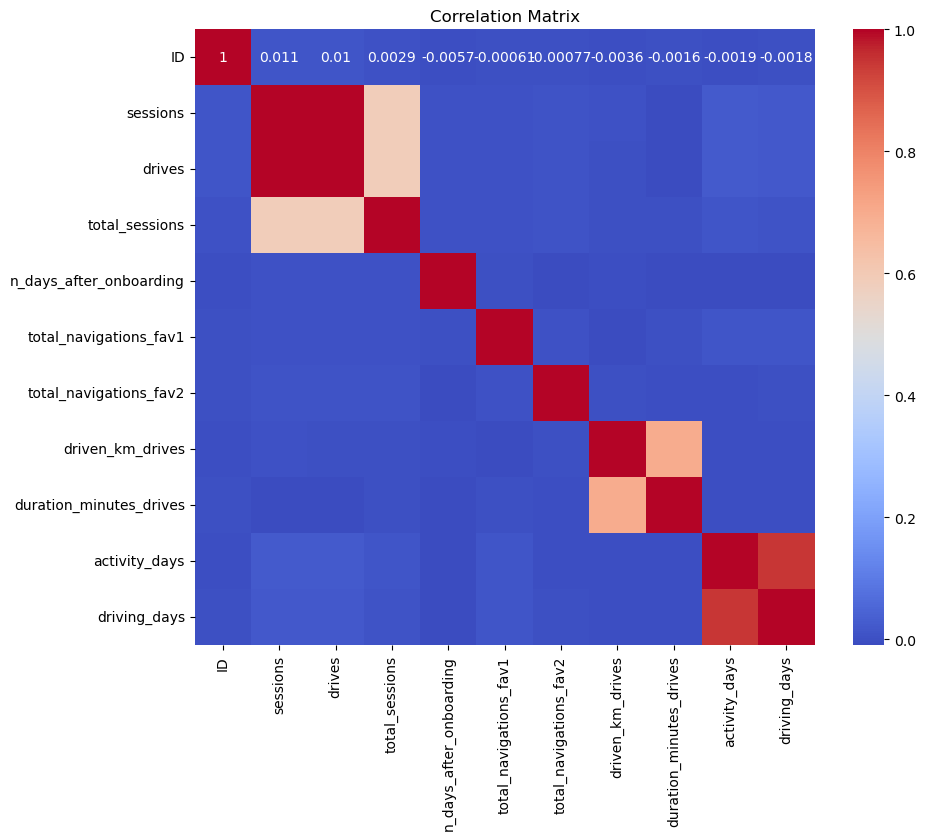

In [23]:
# Correlation Matrix
corr_matrix = waze.corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

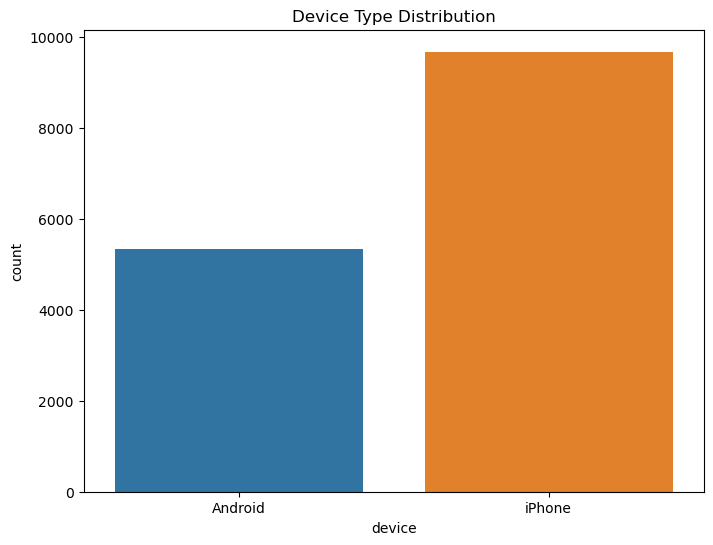

In [24]:
# Plot device type distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='device', data=waze)
plt.title('Device Type Distribution')
plt.show()

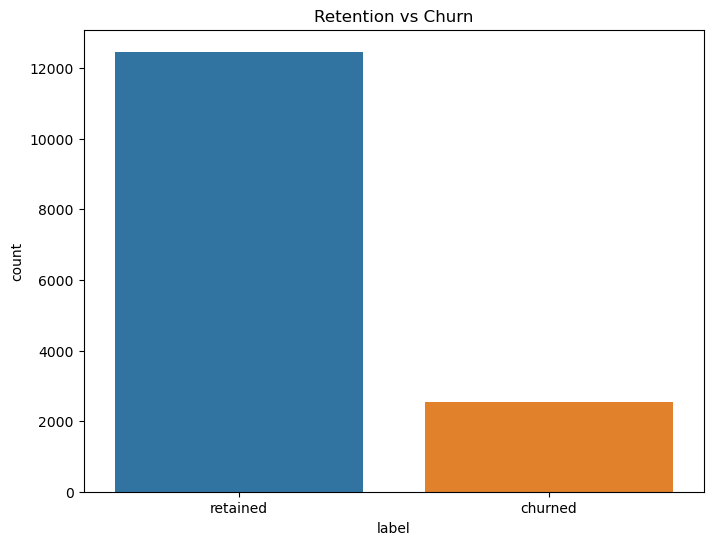

In [25]:
# Plot retention vs churn

plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=waze)
plt.title('Retention vs Churn')
plt.show()


##### LabelEncode
label_encoders = {}

for col in cat_cols:
    label_encoder = LabelEncoder()
    waze[col]= label_encoder.fit_transform(waze[col])
    label_encoders[col] = label_encoder


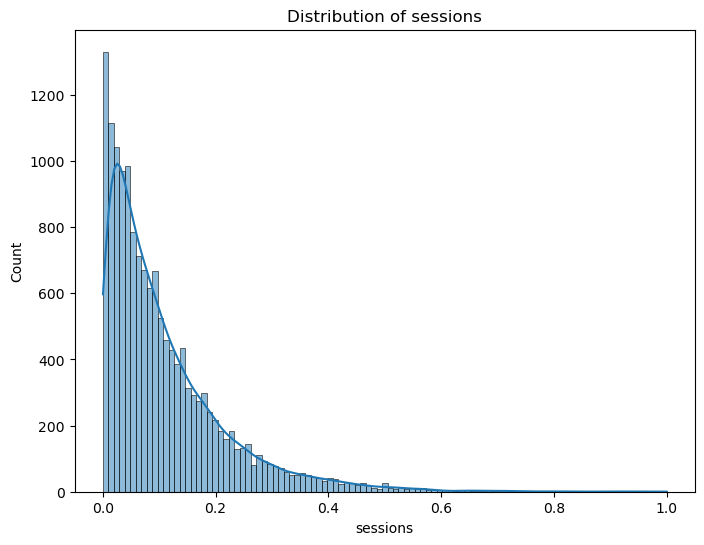

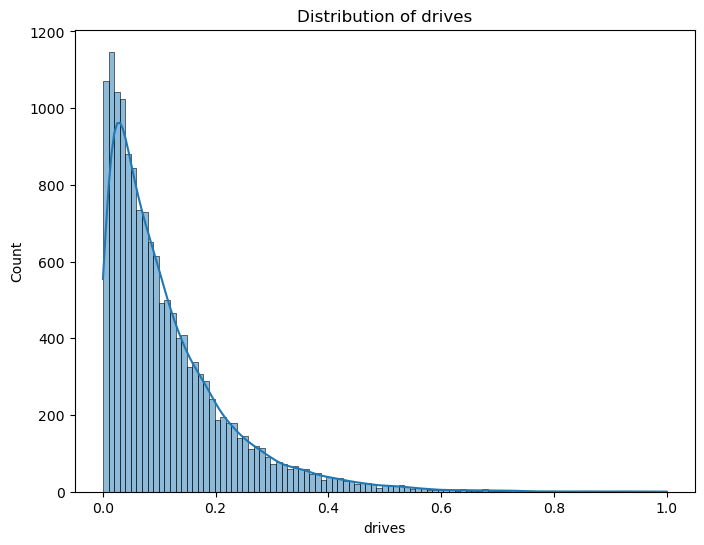

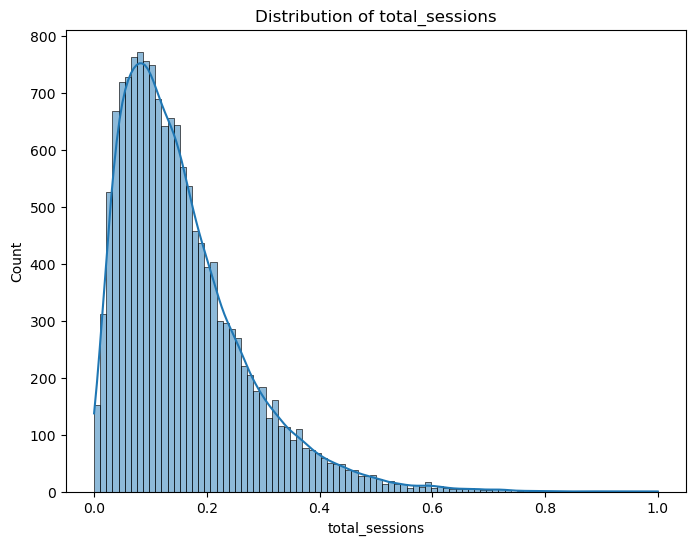

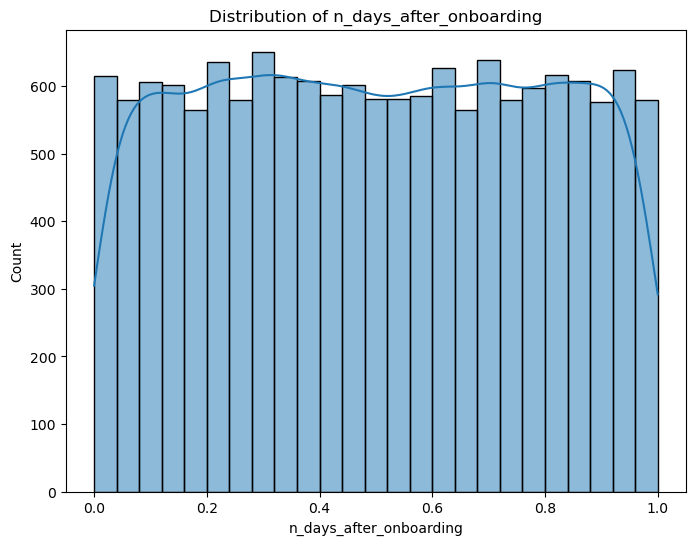

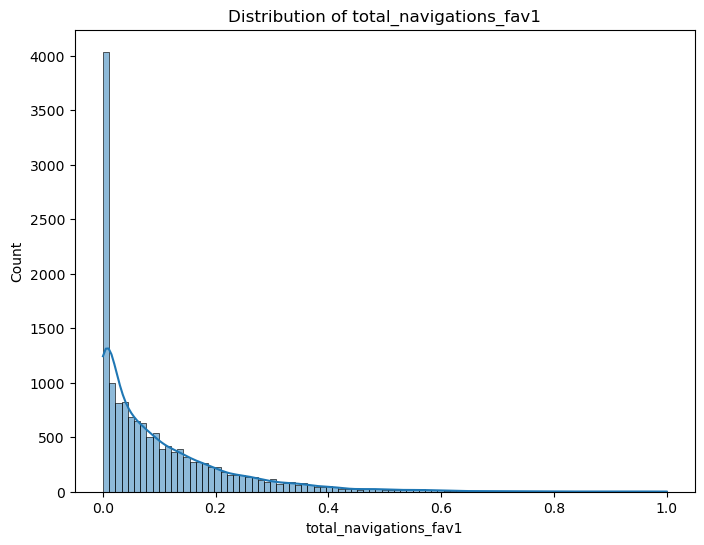

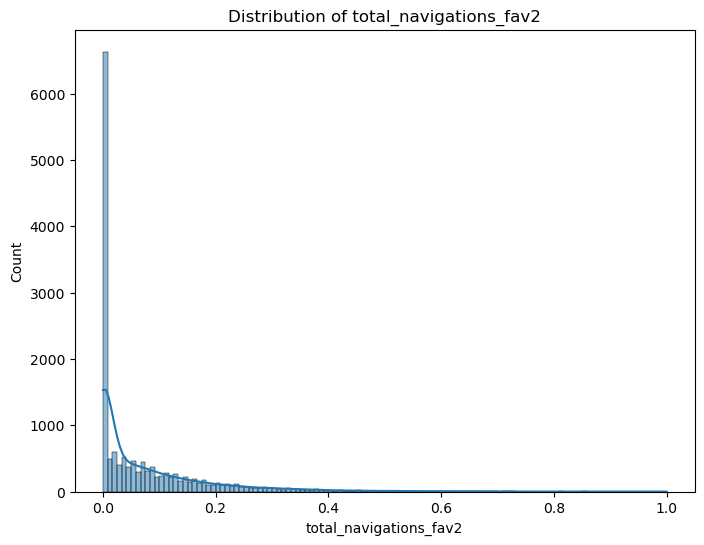

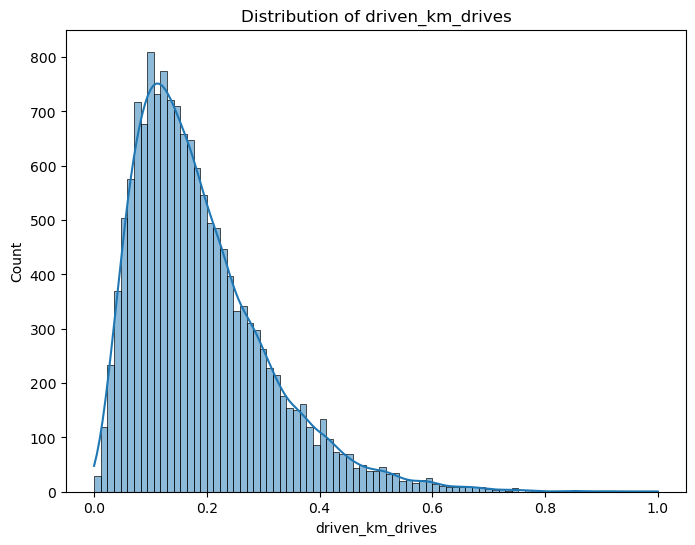

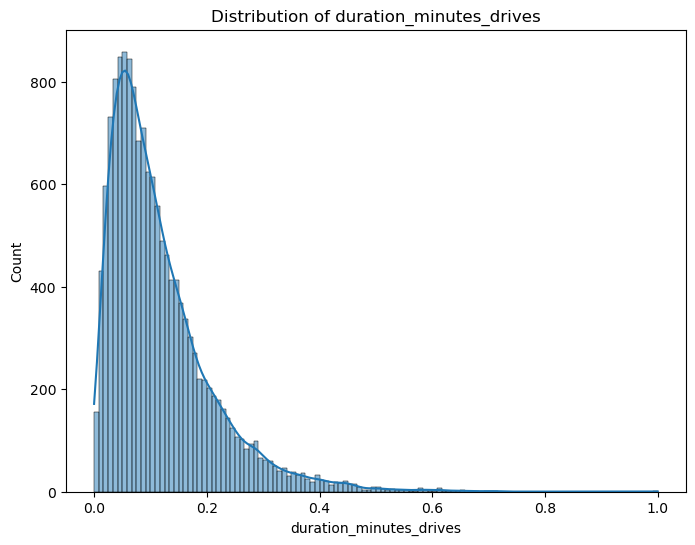

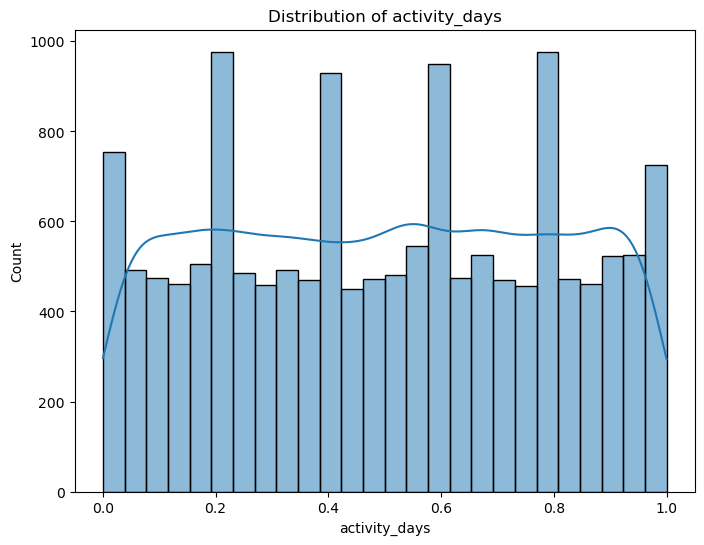

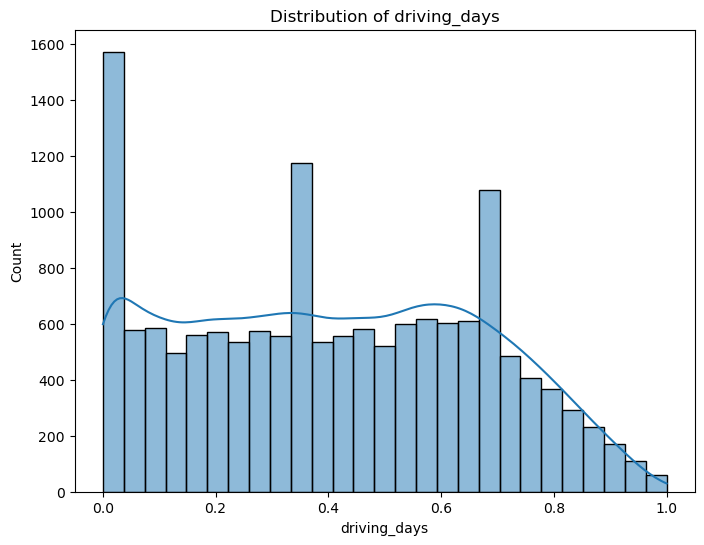

In [26]:
# Plot distribution of numerical features
# Preparing a list of numerical features

numerical_features = ['sessions', 'drives', 'total_sessions', 'n_days_after_onboarding',
                      'total_navigations_fav1', 'total_navigations_fav2', 'driven_km_drives',
                      'duration_minutes_drives', 'activity_days', 'driving_days']

for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(waze[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

## Step 4: Feature Engineering

In [27]:
# Create new features using other features

# Creating a new feature sessions_per_day
# waze['sessions_per_day'] = waze['total_sessions'] / waze['n_days_after_onboarding']

# Creating a new feature avg_km_per_drive
# waze['avg_km_per_drive'] = waze['driven_km_drives'] / waze['drives']


In [28]:
# Check if the new features have been created
waze.columns

Index(['ID', 'label', 'sessions', 'drives', 'total_sessions',
       'n_days_after_onboarding', 'total_navigations_fav1',
       'total_navigations_fav2', 'driven_km_drives', 'duration_minutes_drives',
       'activity_days', 'driving_days', 'device'],
      dtype='object')

In [29]:
# Plot avg_km_per_drive

plt.figure(figsize=(8, 6))
sns.histplot(waze['avg_km_per_drive'], kde=True)
plt.title('Distribution of Avg. KM per Drive')
plt.show()


KeyError: 'avg_km_per_drive'

<Figure size 800x600 with 0 Axes>

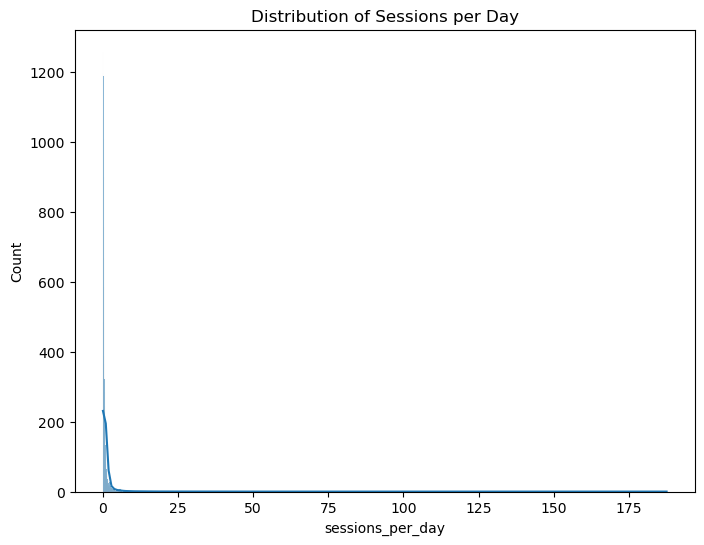

In [ ]:
# Plot sessions_per_day

plt.figure(figsize=(8, 6))
sns.histplot(waze['sessions_per_day'], kde=True)
plt.title('Distribution of Sessions per Day')
plt.show()


In [ ]:
# Encode categorical variables
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    waze[col] = le.fit_transform(waze[col])
    label_encoders[col] = le

## Modeling

In [ ]:
# Split the data

# Separate features and target variables
X = waze.drop(['label'], axis=1)
y = waze['label']

# Convert target to numerical values
y = LabelEncoder().fit_transform(y)

# Split into trainig and testig sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X.shape

(14999, 14)

In [ ]:
y.shape

(14999,)

In [ ]:
# Example: X_train is your feature set
print("Checking for NaNs or Infs in X_train...")

# Check for NaNs
nan_mask = np.isnan(X_train)
if np.any(nan_mask):
    print("NaNs found in X_train!")

# Check for infinity
inf_mask = np.isinf(X_train)
if np.any(inf_mask):
    print("Infinities found in X_train!")


Checking for NaNs or Infs in X_train...
Infinities found in X_train!


In [ ]:
# Replacing Infinity values

# Replace positive infinity with NaN
X_train[np.isposinf(X_train)] = np.nan

# Replace negative infinity with NaN
X_train[np.isneginf(X_train)] = np.nan

# If you have a test set, apply the same replacements
X_test[np.isposinf(X_test)] = np.nan
X_test[np.isneginf(X_test)] = np.nan


In [ ]:
# Impute Nans
# Initialize the imputer to replace NaNs with the mean
imputer = SimpleImputer(strategy='mean')

# Fit and transform the training data
X_train_imputed = imputer.fit_transform(X_train)

# Apply the same transformation to the test data
X_test_imputed = imputer.transform(X_test)


In [ ]:
# Verify Data
# Check if there are still NaNs or Infs in the imputed data
assert not np.any(np.isnan(X_train_imputed)), "NaNs still present in X_train_imputed!"
assert not np.any(np.isinf(X_train_imputed)), "Infs still present in X_train_imputed!"

assert not np.any(np.isnan(X_test_imputed)), "NaNs still present in X_test_imputed!"
assert not np.any(np.isinf(X_test_imputed)), "Infs still present in X_test_imputed!"


## Step 5: Training the mode

In [ ]:
# Training the model using logistic regression

# Initalize the model
model = LogisticRegression().fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)




ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
# Evaluate the model
confusion = confusion_matrix(y_test, y_pred)

print('Confusion Matrix:', confusion)
report = classification_report(y_test, y_pred)

print('\nClassification Report:', report)

NameError: name 'confusion_matrix' is not defined